In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
from sklearn.preprocessing import OneHotEncoder

In [ ]:
en = OneHotEncoder

on_bad_lines="skip" → skips broken rows instead of raising an error.

engine="python" → makes the parser more flexible with messy CSV files.

In [ ]:
data = pd.read_csv("/content/movies_initial.csv" , on_bad_lines ="skip", engine = ("python"))
data

,imdbID,title,year,rating,runtime,genre,released,director,writer,cast,...,imdbRating,imdbVotes,poster,plot,fullplot,language,country,awards,lastupdated,type
0,1,Carmencita,1894,NOT RATED,1 min,"Documentary, Short",NaN,William K.L. Dickson,NaN,Carmencita,...,5.9,1032.0,https://m.media-amazon.com/images/M/MV5BMjAzND...,Performing on what looks like a small wooden s...,Performing on what looks like a small wooden s...,NaN,USA,NaN,2015-08-26 00:03:45.040000000,movie
1,5,Blacksmith Scene,1893,UNRATED,1 min,Short,1893-05-09,William K.L. Dickson,NaN,"Charles Kayser, John Ott",...,6.2,1189.0,NaN,Three men hammer on an anvil and pass a bottle...,A stationary camera looks at a large anvil wit...,NaN,USA,1 win.,2015-08-26 00:03:50.133000000,movie
2,3,Pauvre Pierrot,1892,NaN,4 min,"Animation, Comedy, Short",1892-10-28,�mile Reynaud,NaN,NaN,...,6.7,566.0,NaN,"One night, Arlequin come to see his lover Colo...","One night, Arlequin come to see his lover Colo...",NaN,France,NaN,2015-08-12 00:06:02.720000000,movie
3,8,Edison Kinetoscopic Record of a Sneeze,1894,NaN,1 min,"Documentary, Short",1894-01-09,William K.L. Dickson,NaN,Fred Ott,...,5.9,988.0,NaN,A man (Thomas Edison's assistant) takes a pinc...,A man (Edison's assistant) takes a pinch of sn...,NaN,USA,NaN,2015-08-10 00:21:07.127000000,movie
4,10,Employees Leaving the Lumi�re Factory,1895,NaN,1 min,"Documentary, Short",1895-03-22,Louis Lumi�re,NaN,NaN,...,6.9,3469.0,NaN,A man opens the big gates to the Lumi�re facto...,A man opens the big gates to the Lumi�re facto...,NaN,France,NaN,2015-08-26 00:03:56.603000000,movie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2169,33804,The Lady Eve,1941,NOT RATED,94 min,"Comedy, Romance",1941-03-21,Preston Sturges,Monckton Hoffe (screen play: based on a story ...,"Barbara Stanwyck, Henry Fonda, Charles Coburn,...",...,8.0,13557.0,https://m.media-amazon.com/images/M/MV5BMjA1OT...,A trio of classy card sharps targets the socia...,Returning from a year up the Amazon studying s...,English,USA,Nominated for 1 Oscar. Another 2 wins.,2015-08-26 01:10:05.430000000,movie
2170,33870,The Maltese Falcon,1941,NOT RATED,100 min,"Crime, Drama, Film-Noir",1941-10-18,John Huston,"John Huston (screenplay), Dashiell Hammett (ba...","Humphrey Bogart, Mary Astor, Gladys George, Pe...",...,8.2,103084.0,https://m.media-amazon.com/images/M/MV5BMTc4MD...,A private detective takes on a case that invol...,Spade and Archer is the name of a San Francisc...,English,USA,Nominated for 3 Oscars. Another 2 wins.,2015-09-15 04:50:25.603000000,movie
2171,33853,Love on the Dole,1941,APPROVED,94 min,Drama,1945-10-12,John Baxter,"Walter Greenwood (novel), Ronald Gow (play), W...","Deborah Kerr, Clifford Evans, George Carney, M...",...,6.9,246.0,https://m.media-amazon.com/images/M/MV5BMTYzNj...,"During the depression in England, a young lady...","During the depression in England, a young lady...",English,UK,1 win.,2015-06-27 00:33:20.233000000,movie
2172,33865,Mail Early for Christmas,1959,NaN,2 min,"Animation, Short",NaN,Norman McLaren,NaN,NaN,...,5.5,70.0,NaN,NaN,NaN,NaN,Canada,NaN,2014-10-06 00:02:15.520000000,movie


In [ ]:
df = data

In [ ]:
df.shape

(33993, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33993 entries, 0 to 33992
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   imdbID       33993 non-null  int64  
 1   title        33993 non-null  object 
 2   year         33993 non-null  object 
 3   rating       20725 non-null  object 
 4   runtime      33380 non-null  object 
 5   genre        33750 non-null  object 
 6   released     32309 non-null  object 
 7   director     33629 non-null  object 
 8   writer       32272 non-null  object 
 9   cast         33510 non-null  object 
 10  metacritic   6289 non-null   float64
 11  imdbRating   33914 non-null  float64
 12  imdbVotes    33913 non-null  float64
 13  poster       27460 non-null  object 
 14  plot         31512 non-null  object 
 15  fullplot     31000 non-null  object 
 16  language     33331 non-null  object 
 17  country      33938 non-null  object 
 18  awards       17608 non-null  object 
 19  last

In [ ]:
df.isnull().sum()

,0
imdbID,0
title,0
year,0
rating,13268
runtime,613
genre,243
released,1684
director,364
writer,1721
cast,483


<Axes: >

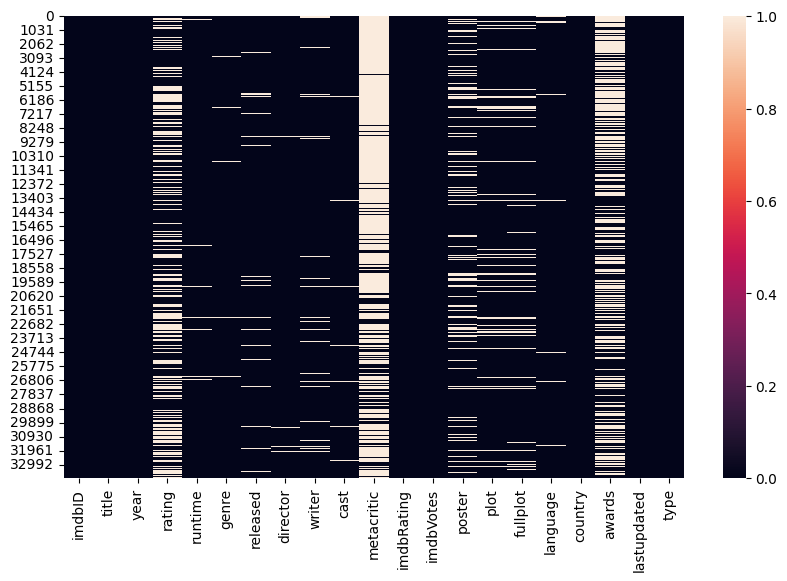

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(df.isnull())

In [ ]:
null_percentage = data.isnull().sum()/data.shape[0]*100
null_percentage

,0
imdbID,0.000000
title,0.000000
year,0.000000
rating,39.031565
runtime,1.803312
genre,0.714853
released,4.953961
director,1.070809
writer,5.062807
cast,1.420881


In [ ]:
df = df.fillna ("unknown")

<Axes: >

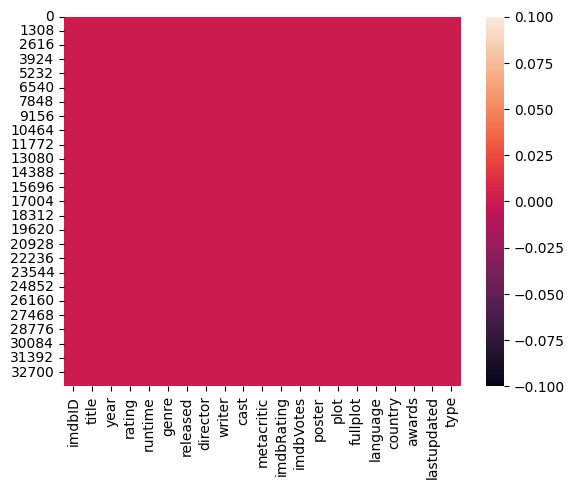

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
print (df.head())
print(df.dtypes)

   imdbID                                   title  year     rating runtime  \
0       1                              Carmencita  1894  NOT RATED   1 min   
1       5                        Blacksmith Scene  1893    UNRATED   1 min   
2       3                          Pauvre Pierrot  1892    unknown   4 min   
3       8  Edison Kinetoscopic Record of a Sneeze  1894    unknown   1 min   
4      10   Employees Leaving the Lumi�re Factory  1895    unknown   1 min   

                      genre    released              director   writer  \
0        Documentary, Short     unknown  William K.L. Dickson  unknown   
1                     Short  1893-05-09  William K.L. Dickson  unknown   
2  Animation, Comedy, Short  1892-10-28         �mile Reynaud  unknown   
3        Documentary, Short  1894-01-09  William K.L. Dickson  unknown   
4        Documentary, Short  1895-03-22         Louis Lumi�re  unknown   

                       cast  ... imdbRating imdbVotes  \
0                Carmencita  

In [ ]:
df['imdbRating'] = pd.to_numeric(df['imdbRating'], errors = 'coerce')

<function matplotlib.pyplot.show(close=None, block=None)>

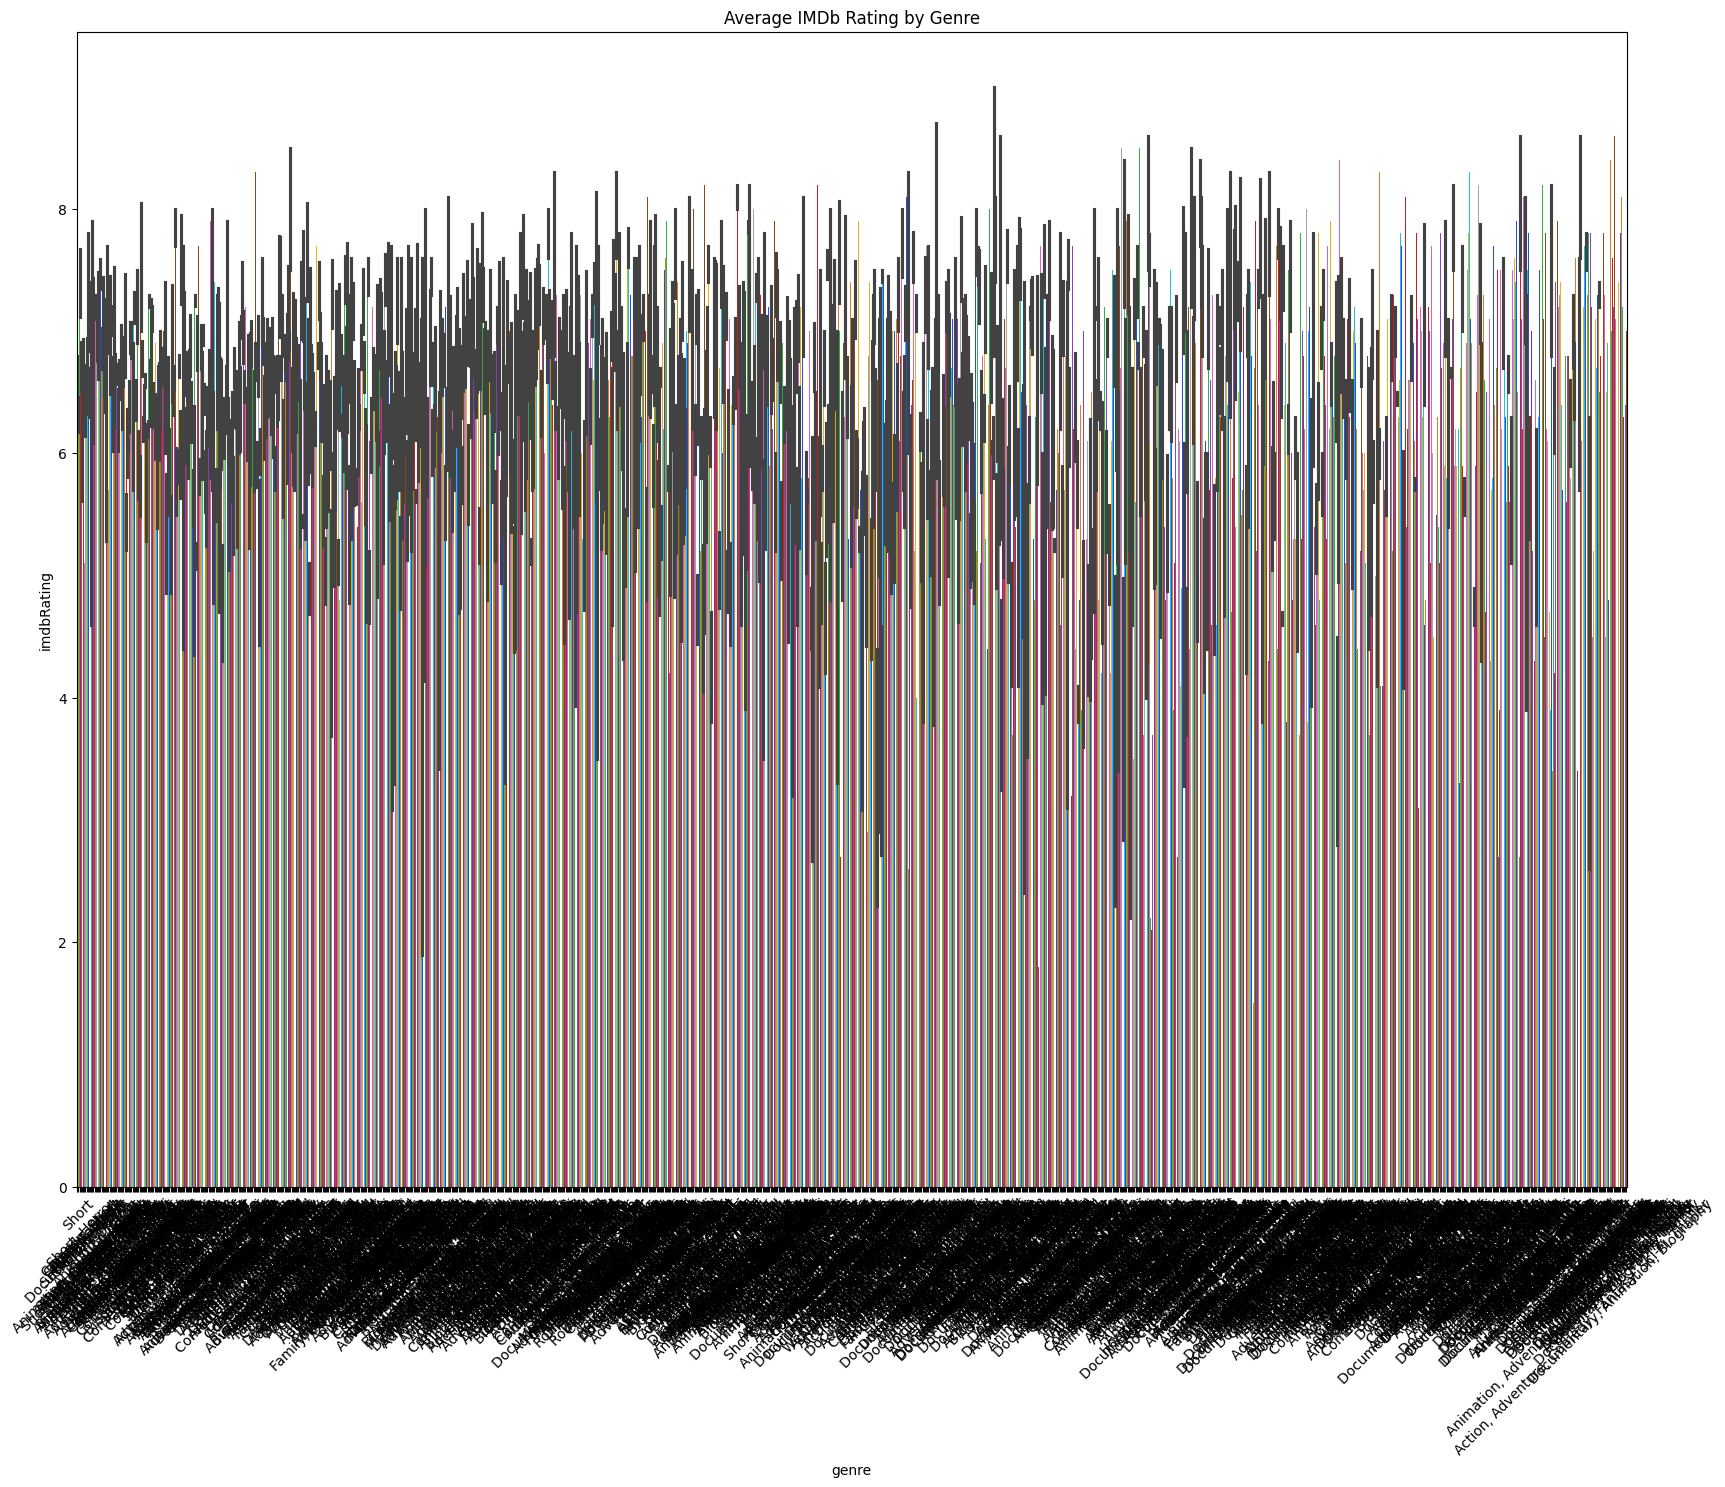

In [ ]:
plt.figure(figsize = (20,15))
sns.barplot(data = df , x = 'genre' , y = 'imdbRating', palette = 'bright', errorbar = 'ci' )
plt.xticks(rotation = 45)
plt.title("Average IMDb Rating by Genre")
plt.show

In [ ]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='year', y='imdbRating', hue='genre', alpha=0.7)
plt.title("IMDb Ratings Over Time")
plt.show()

         genre  imdbRating_num  year_num
0  Documentary             5.9    1894.0
1        Short             5.9    1894.0
2        Short             6.2    1893.0
3    Animation             6.7    1892.0
4       Comedy             6.7    1892.0
genre
Drama      16932
Comedy     10823
Romance     5070
Crime       4511
Action      4490
Name: count, dtype: int64


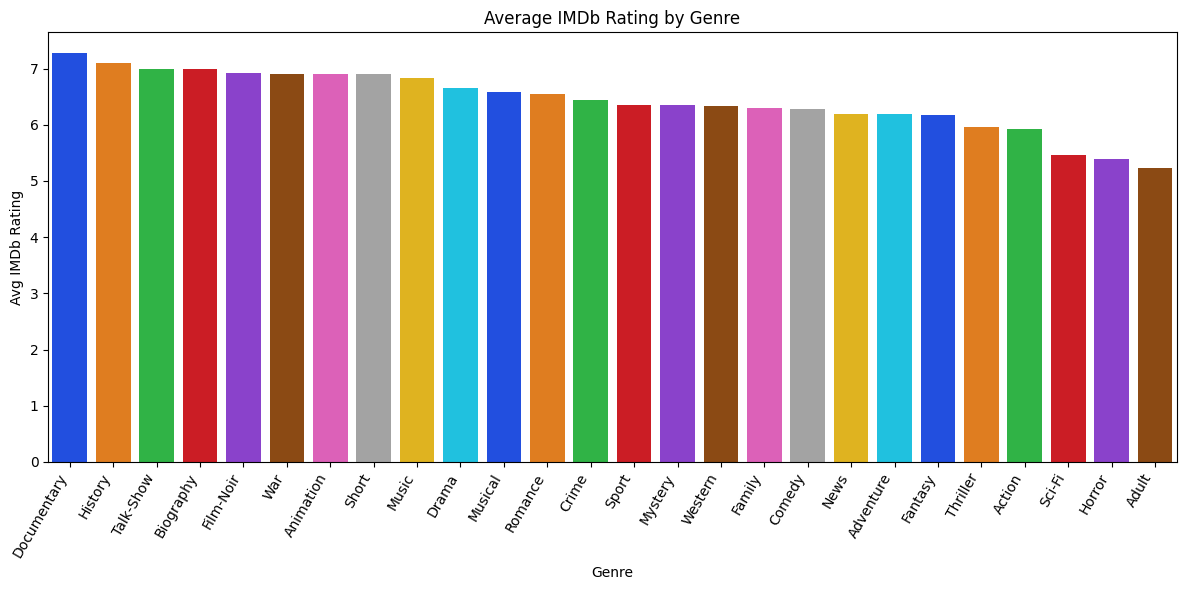

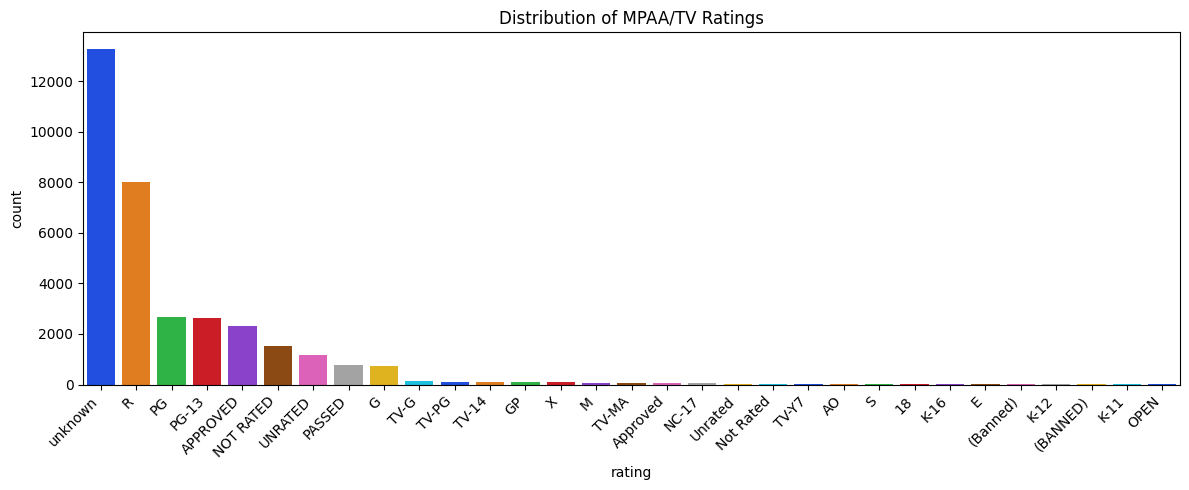

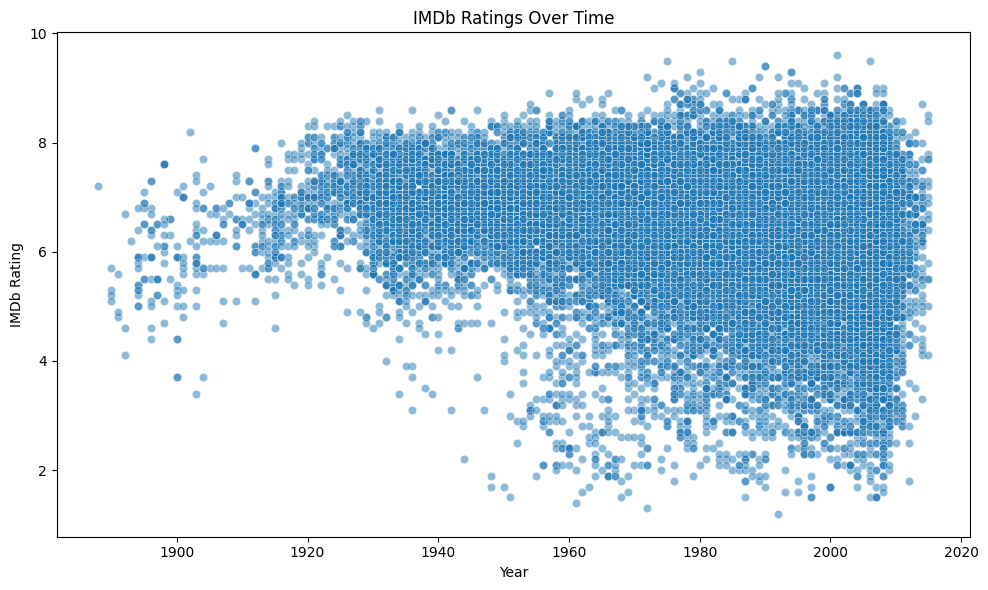